In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
save_folder = os.path.join("results","images")

In [3]:
filepath = os.path.join("results","radar_target_recognition_snr_trajectory_geometry_avg_seeded.csv")

df = pd.read_csv(filepath)
print(df.head().to_string())
df.head()

                             run_id       experiment_id    status                                                                                            artifact_uri                        start_time                          end_time  accuracy  accuracy_single fusion_method  elevation_spread mlflow_track single_method  random_seed    vx  SNR_constraint  n_radars  elevation_jitter_width geometry  MC_Trials     TN noise_method yaw_range model_choice azimuth_jitter_bounds  azimuth_jitter_width pitch_range elevation_jitter_bounds  time_step_size  elevation_center  color  azimuth_center  azimuth_spread                                              experiment_name  roll_range  num_points tags.mlflow.runName tags.mlflow.source.type tags.mlflow.user    tags.mlflow.source.name                                                                                                                                                                                                                           

run_id       experiment_id    status  \
0  74485e594b4a4384af1cb31c2aad7ba4  798656255484474797  FINISHED   
1  8d83ccabb0824824a0809eddf33be4ef  798656255484474797  FINISHED   
2  94f50d30b75346c5a5d7e1a938c73378  798656255484474797  FINISHED   
3  99399a629778495f8164d09855e8dab9  798656255484474797  FINISHED   
4  0e96158a72de47f2bc6934ba4af336b4  798656255484474797  FINISHED   

                                        artifact_uri  \
0  file:///scratch/potter.mi/RCS_ATR/mlruns/79865...   
1  file:///scratch/potter.mi/RCS_ATR/mlruns/79865...   
2  file:///scratch/potter.mi/RCS_ATR/mlruns/79865...   
3  file:///scratch/potter.mi/RCS_ATR/mlruns/79865...   
4  file:///scratch/potter.mi/RCS_ATR/mlruns/79865...   

                         start_time                          end_time  \
0  2024-01-28 05:58:26.285000+00:00  2024-01-28 09:10:37.210000+00:00   
1  2024-01-28 05:58:07.168000+00:00  2024-01-28 08:06:12.605000+00:00   
2  2024-01-28 05:56:25.661000+00:00  2024-01-28 07:56:18.211000+00:00   
3  2024-01-28 05:55:26.352000+00:00  2024-01-28 07:57:48.431000+00:00   
4  2024-01-28 05:55:05.892000+00:00  2024-01-28 09:05:32.440000+00:00   

   accuracy  accuracy_single fusion_method  elevation_spread  ...  \
0  0.775057         0.948621           max             180.0  ...   
1  0.810179         0.979957           max             180.0  ...   
2  0.977107         0.996129           max             180.0  ...   
3  0.937471         0.994293           max             180.0  ...   
4  0.972757         0.995836           max             180.0  ...   

  azimuth_spread                                    experiment_name  \
0          180.0  radar_target_recognition_snr_trajectory_geomet...   
1          180.0  radar_target_recognition_snr_trajectory_geomet...   
2          180.0  radar_target_recognition_snr_trajectory_geomet...   
3          180.0  radar_target_recognition_snr_trajectory_geomet...   
4          180.0  radar_target_recognition_snr_trajectory_geomet...   

   roll_range  num_points  tags.mlflow.runName  tags.mlflow.source.type  \
0         0.0     10000.0                  mlp                    LOCAL   
1         0.0     10000.0                  mlp                    LOCAL   
2         0.0     10000.0                  mlp                    LOCAL   
3         0.0     10000.0                  mlp                    LOCAL   
4         0.0     10000.0                  mlp                    LOCAL   

   tags.mlflow.user    tags.mlflow.source.name  \
0         potter.mi  main_mc_trajectory_SNR.py   
1         potter.mi  main_mc_trajectory_SNR.py   
2         potter.mi  main_mc_trajectory_SNR.py   
3         potter.mi  main_mc_trajectory_SNR.py   
4         potter.mi  main_mc_trajectory_SNR.py   

                                       accuracy_time  \
0  [0.55780714,0.66674286,0.70717143,0.72856429,0...   
1  [0.60327857,0.7134    ,0.75368571,0.77538571,0...   
2  [0.75383571,0.86172857,0.90089286,0.92032857,0...   
3  [0.70455714,0.81497143,0.85456429,0.87571429,0...   
4  [0.78468571,0.8804    ,0.91113571,0.92725714,0...   

                                accuracy_single_time  
0  [0.41287143,0.50402857,0.56172143,0.60285714,0...  
1  [0.43403571,0.53185   ,0.59317857,0.64038571,0...  
2  [0.49302143,0.60842143,0.67956429,0.72773571,0...  
3  [0.47625714,0.58754286,0.65670714,0.70484286,0...  
4  [0.50427857,0.62284286,0.6924    ,0.73925714,0...  

[5 rows x 41 columns]

In [4]:
df = df[~pd.isna(df).any(axis=1)].reset_index(drop=True)
df.shape

(675, 41)

In [5]:
df.fusion_method = df.fusion_method.apply(lambda x: x.replace("fusion","OBF"))

In [6]:
N_radars = 16
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000)
]

In [7]:
# Combine elevation and azimuth jitter widths
filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)

filtered_data.groupby(["model_choice","fusion_method","combined_jitter_width","SNR_constraint"]).mean()['accuracy'].unstack().unstack()


C:\Users\lpott\AppData\Local\Temp\ipykernel_38704\517586425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)


SNR_constraint                 -20.0                                          \
combined_jitter_width           0.0       10.0      20.0      50.0      80.0   
model_choice fusion_method                                                     
logistic     OBF            0.564521  0.559321  0.554329  0.541400  0.531650   
             average        0.417757  0.418593  0.418021  0.418386  0.418850   
             max            0.259557  0.258893  0.259179  0.258879  0.258343   
mlp          OBF            0.868100  0.862764  0.800671  0.705343  0.642050   
             average        0.699029  0.721936  0.695693  0.579757  0.527114   
             max            0.527393  0.500164  0.431314  0.409614  0.382000   
xgboost      OBF            0.932979  0.905443  0.867464  0.664214  0.613371   
             average        0.643657  0.634586  0.604479  0.527193  0.494857   
             max            0.405279  0.394464  0.373114  0.334457  0.318086   

SNR_constraint                 -10.0                                          \
combined_jitter_width           0.0       10.0      20.0      50.0      80.0   
model_choice fusion_method                                                     
logistic     OBF            0.732050  0.729679  0.726964  0.719536  0.714557   
             average        0.598293  0.598300  0.597943  0.597086  0.595129   
             max            0.337157  0.337286  0.337271  0.337771  0.337614   
mlp          OBF            0.952464  0.921757  0.897957  0.786386  0.741693   
             average        0.819236  0.823207  0.775536  0.663479  0.672386   
             max            0.618157  0.602936  0.574786  0.487229  0.482457   
xgboost      OBF            0.979050  0.965607  0.934207  0.785521  0.728014   
             average        0.776457  0.776429  0.728407  0.645814  0.611164   
             max            0.492600  0.464129  0.430571  0.370107  0.342093   

SNR_constraint              ...      10.0                                \
combined_jitter_width       ...      0.0       10.0      20.0      50.0   
model_choice fusion_method  ...                                           
logistic     OBF            ...  0.941543  0.942393  0.943186  0.944714   
             average        ...  0.728664  0.728579  0.728457  0.728479   
             max            ...  0.548736  0.548579  0.548500  0.548329   
mlp          OBF            ...  0.999921  0.999914  0.998786  0.983821   
             average        ...  0.994979  0.997800  0.982286  0.965593   
             max            ...  0.955014  0.935729  0.882057  0.811186   
xgboost      OBF            ...  1.000000  1.000000  1.000000  0.989721   
             average        ...  0.999979  0.999964  0.999543  0.986179   
             max            ...  0.832214  0.802079  0.768164  0.703543   

SNR_constraint                            20.0                                \
combined_jitter_width           80.0      0.0       10.0      20.0      50.0   
model_choice fusion_method                                                     
logistic     OBF            0.944550  0.957936  0.958621  0.959286  0.959657   
             average        0.728707  0.769386  0.769271  0.769293  0.769714   
             max            0.548157  0.542286  0.542157  0.542007  0.541750   
mlp          OBF            0.959871  0.999993  1.000000  0.999979  0.999429   
             average        0.927579  0.999486  0.999779  0.997393  0.993050   
             max            0.772500  0.990164  0.994843  0.979729  0.896957   
xgboost      OBF            0.985271  1.000000  1.000000  1.000000  0.996993   
             average        0.981343  1.000000  1.000000  0.999979  0.992036   
             max            0.662971  0.946793  0.906557  0.867014  0.832529   

SNR_constraint                        
combined_jitter_width           80.0  
model_choice fusion_method            
logistic     OBF            0.959786  
             average        0.770507  
             max     

## Accuracy vs Jitter per SNR

In [8]:
N_radars = 16

filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") 
]

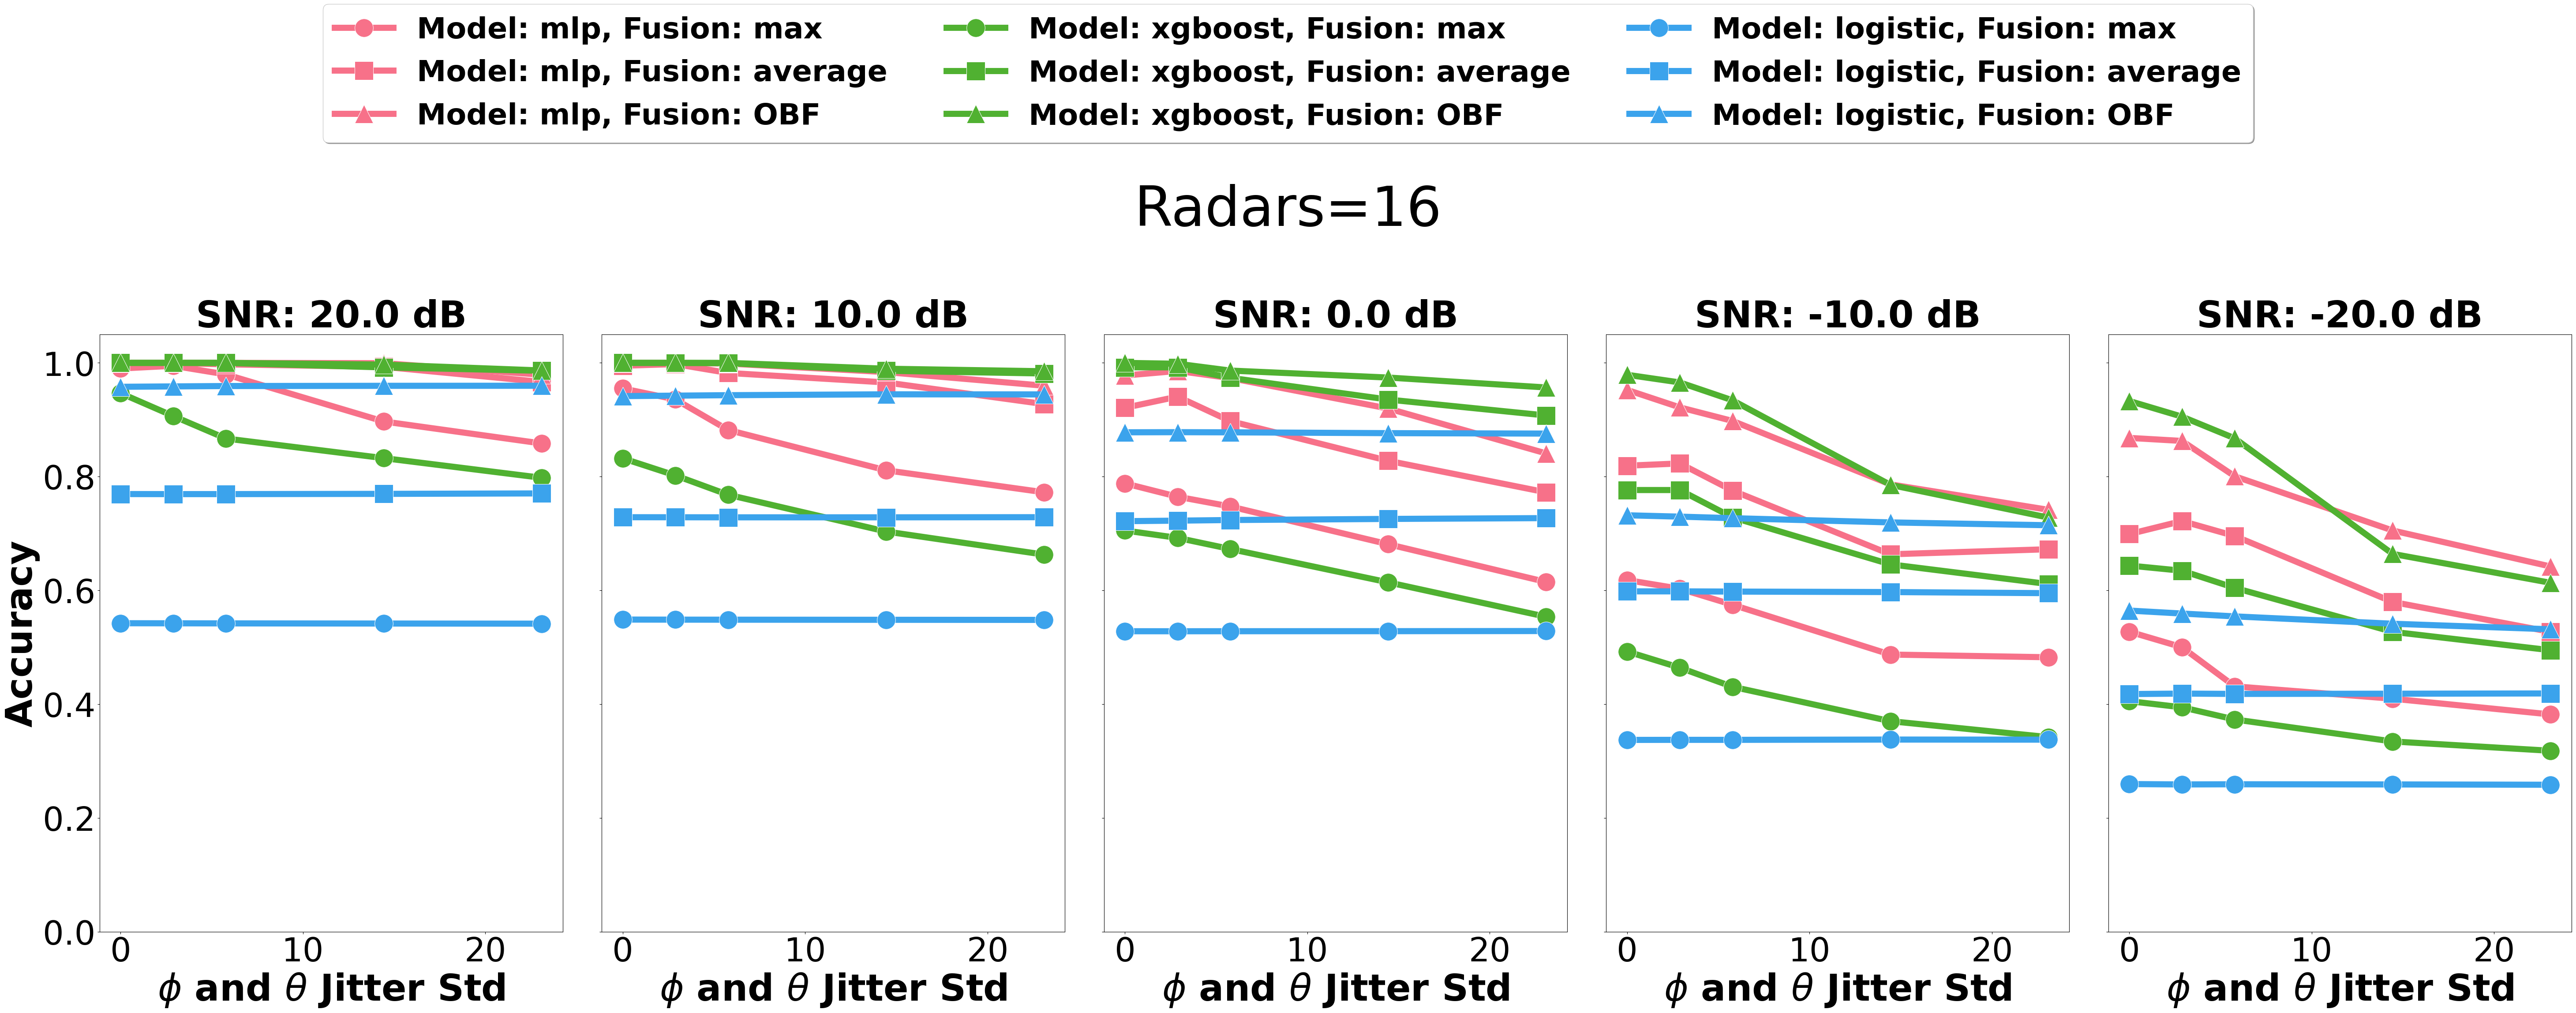

In [9]:
# Create subplots for each SNR_constraint
unique_constraints = np.sort(filtered_data['SNR_constraint'].unique())[::-1]
unique_models = filtered_data['model_choice'].unique()
unique_fusion_methods = ["max","average","OBF"]

SMALL_SIZE = 60
plt.rc('xtick', labelsize=SMALL_SIZE*0.9)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE*0.9)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE) 


# fig, axes = plt.subplots(len(unique_constraints), 1, figsize=(7.5, 30))
fig, axes = plt.subplots( 1,len(unique_constraints), figsize=(60,20),sharey=True)


markers = ['o', 's', '^', 'v', 'D']  # Different markers for fusion methods
marker_dict = {fusion_method: marker for fusion_method, marker in zip(unique_fusion_methods, markers)}

colors = sns.color_palette("husl", len(unique_models))  # Different colors for models
color_dict = {model: color for model, color in zip(unique_models, colors)}

for i, constraint in enumerate(unique_constraints):
    ax = axes[i]
    for model in unique_models:
        model_color = color_dict[model]
        for fusion_method in unique_fusion_methods:
            data_subset = filtered_data[
                (filtered_data['model_choice'] == model) &
                (filtered_data['SNR_constraint'] == constraint) &
                (filtered_data['fusion_method'] == fusion_method)
            ]

            marker = marker_dict[fusion_method]
            line = sns.lineplot(
                data=data_subset,
                x=np.sqrt(data_subset['azimuth_jitter_width']**2 / 12),
                y='accuracy',
                label=f"Model: {model}, Fusion: {fusion_method}",
                marker=marker,
                color=model_color,
                ax=ax,
                legend=None,
                markersize=30,
                linewidth=10
            )
    
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=45)    
#     ax.set_ylim([0.2,0.9])
    ax.set_title(f"SNR: {constraint} dB",fontsize=SMALL_SIZE,weight='bold')
    ax.set_xlabel('$\phi$ and $\\theta$ Jitter Std',fontsize=SMALL_SIZE,weight='bold')
    ax.set_ylabel('Accuracy',fontsize=SMALL_SIZE,weight='bold')
    ax.set_ylim([0,1.05])

# Get all unique labels for the legend
lines = [line for line in ax.get_lines()]
labels = [line.get_label() for line in lines]
# Create a single legend for the entire figure
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.2), fancybox=True, shadow=True, ncol=3,prop={'size':SMALL_SIZE*0.8,'weight':'bold'})
fig.suptitle(f"Radars={N_radars}",fontsize=SMALL_SIZE*1.5)
plt.tight_layout(w_pad=1)
plt.savefig(os.path.join(save_folder,"fusion_method.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

### accuracy curves for number of radars

In [10]:
Jitter_filter = 80
model = "xgboost"
filtered_data = df[
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    (df['model_choice'] == model) & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

jitter_std = np.round(np.sqrt(Jitter_filter**2 / 12),2)

unique_constraints = filtered_data['SNR_constraint'].unique()
unique_models = filtered_data['model_choice'].unique()
unique_fusion_methods = ["max","average","OBF"] #filtered_data['fusion_method'].unique()
unique_radars = filtered_data["n_radars"].unique()[::-1]
unique_snr = filtered_data["SNR_constraint"].unique()[::-1]

In [11]:
SMALL_SIZE = 70
plt.rc('xtick', labelsize=SMALL_SIZE * 0.9)
plt.rc('ytick', labelsize=SMALL_SIZE * 0.9)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

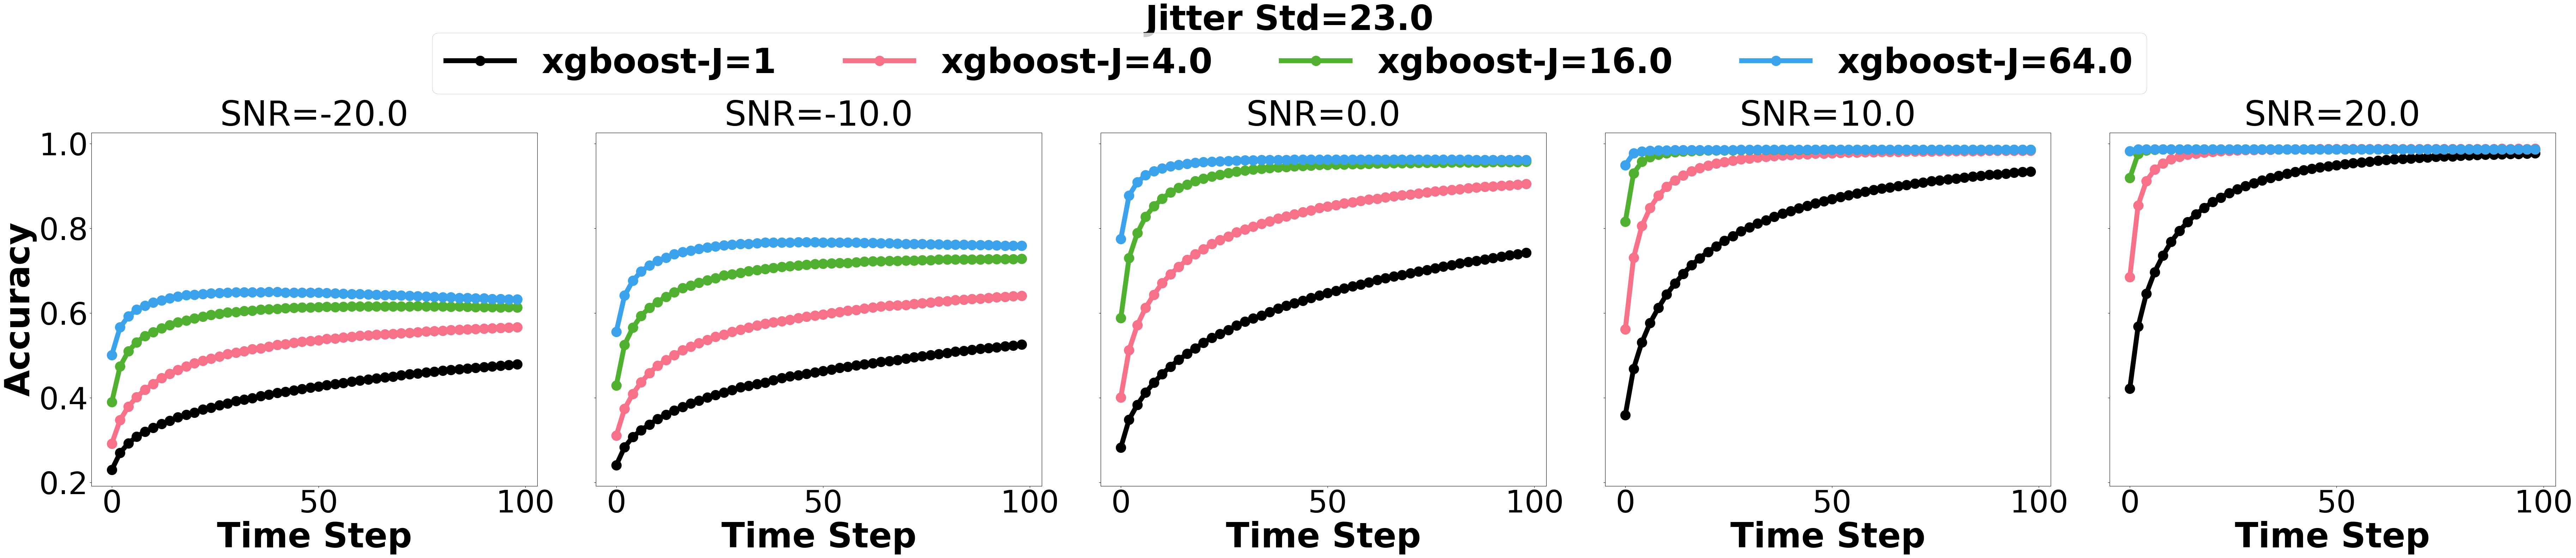

In [12]:
SNR_unique = filtered_data.SNR_constraint.unique()
Model_unique = filtered_data.model_choice.unique()
Fusion_method = ['max','average','OBF']

colors = sns.color_palette("husl", len(unique_radars))
color_dict = {radar:color for radar, color in zip(unique_radars, colors)}

colors = ["blue","purple","magenta"]
markers = ["d","s","o","2","+"]
legend = []
fig,axes = plt.subplots(1,len(unique_snr),sharey=True,figsize=(15*len(SNR_unique),17))
skip_every = 2
for i,SNR in enumerate(unique_snr):
    temp_df = filtered_data[(filtered_data.SNR_constraint==SNR) & (filtered_data.fusion_method=="OBF") & (filtered_data.n_radars==4)]
    acc_single = np.array(eval(temp_df.accuracy_single_time.item()))
    axes[i].plot(np.arange(0,len(acc_single),skip_every),acc_single[::skip_every],marker='o',markersize=20,color="k",linewidth=10)
    if i == 0:
        legend.append(f"{model}-J={1}")
        
    for j,n_radar in enumerate(unique_radars):

        temp_df = filtered_data[(filtered_data.SNR_constraint==SNR) & (filtered_data.fusion_method=="OBF") & (filtered_data.n_radars==n_radar)]
        acc_single = np.array(eval(temp_df.accuracy_single_time.item()))
#         print(acc_single[-1])
        acc_fused = np.array(eval(temp_df.accuracy_time.item()))
        axes[i].plot(np.arange(0,len(acc_fused),skip_every),acc_fused[::skip_every],marker='o',markersize=20,color=color_dict[n_radar],linewidth=10)
        axes[i].set_title(f"SNR={SNR}",fontsize=SMALL_SIZE)

        if i == 0:
            legend.append(f"{model}-J={n_radar}")
    
    axes[i].set_xlabel("Time Step",weight='bold')
    axes[i].set_xlabel("Time Step",weight='bold')



jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

axes[0].set_ylabel("Accuracy",weight='bold')
# axes[0].set_title(f"{N_radars} Radars, No $(\\theta,\phi)$",fontsize=20)
# axes[1].set_title(f"Single Radar, No $(\\theta,\phi)$",fontsize=20)
fig.suptitle(f"Jitter Std={jitter_std}",fontsize=SMALL_SIZE,weight='bold')
fig.legend(legend,loc='upper center', bbox_to_anchor=(.5, 0.96),fontsize=SMALL_SIZE, ncol=len(unique_radars)+1,prop={"weight":"bold"})
plt.tight_layout()

plt.savefig(os.path.join(save_folder,"accuracy_curves_vs_radar_snr.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Acc vs SNR

In [13]:
SMALL_SIZE = 60
plt.rc('xtick', labelsize=SMALL_SIZE * 1.5)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.5)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

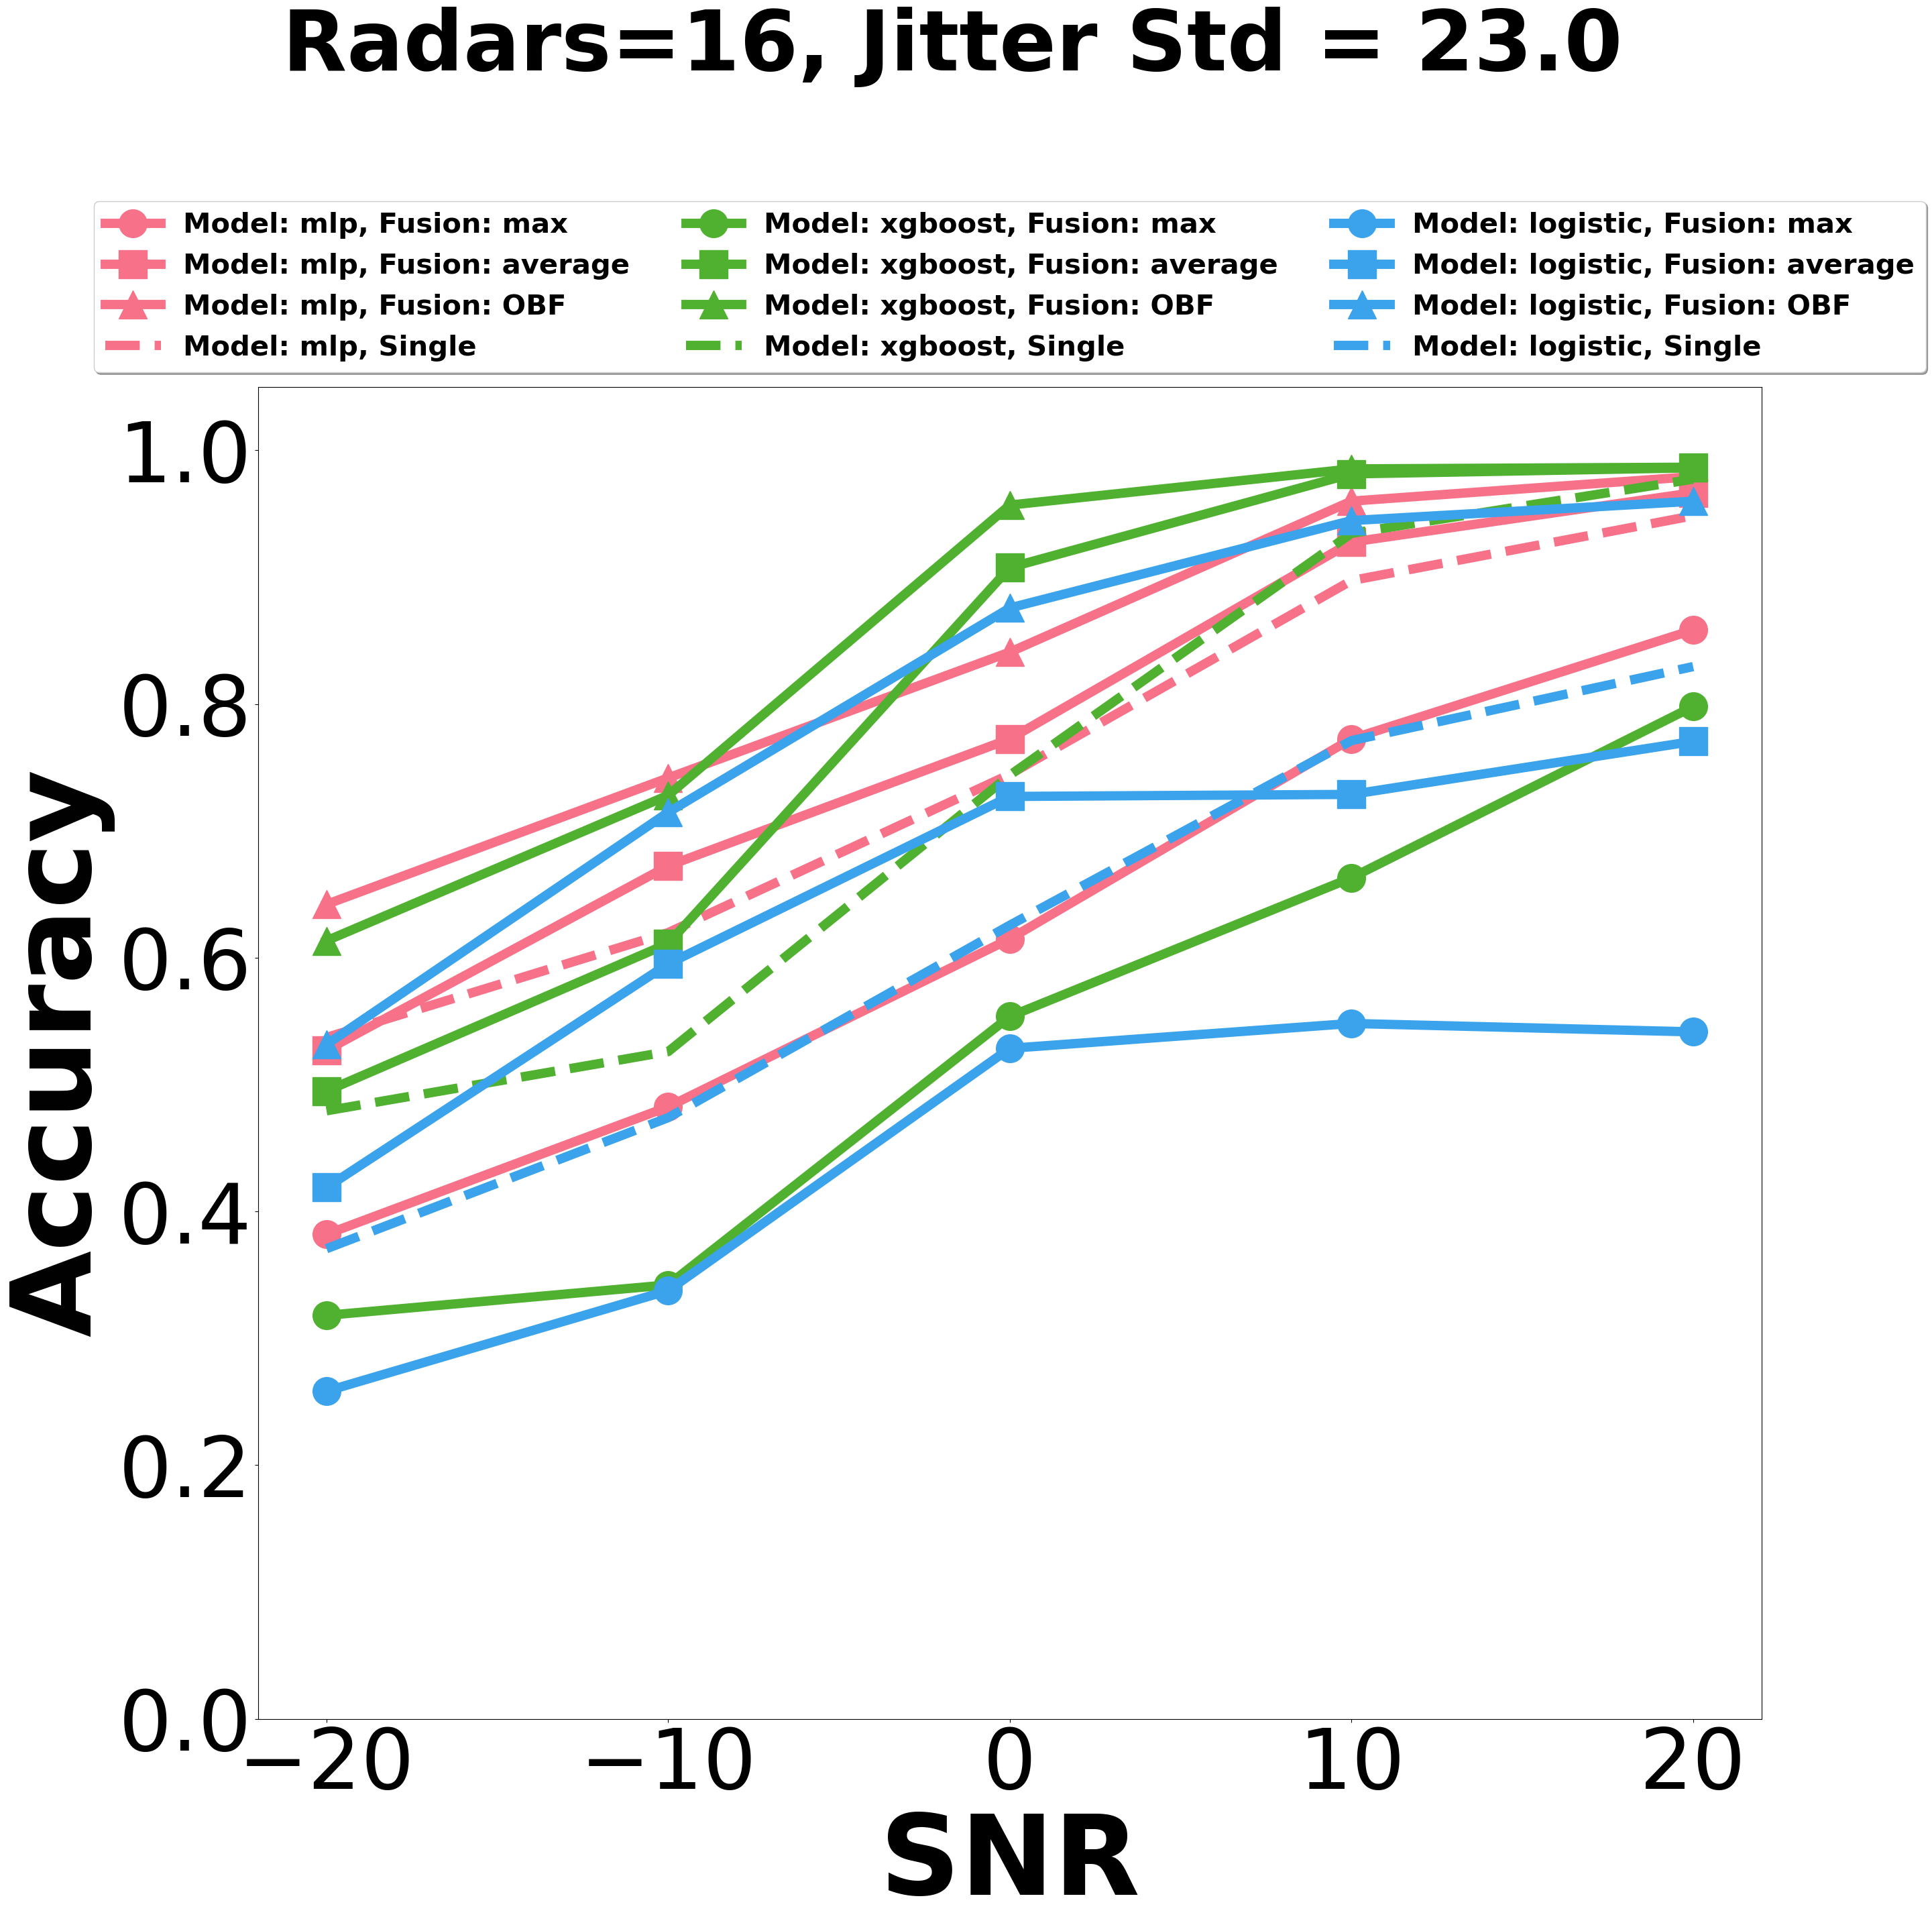

In [14]:
Jitter_filter = 80
N_radars = 16
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

unique_constraints = filtered_data['SNR_constraint'].unique()
unique_models = filtered_data['model_choice'].unique()
unique_fusion_methods = ["max","average","OBF"] #filtered_data['fusion_method'].unique()


fig, ax = plt.subplots(figsize=(30, 30))
# ax.set_aspect('equal')


markers = ['o', 's', '^', 'v', 'D']
marker_dict = {fusion_method: marker for fusion_method, marker in zip(unique_fusion_methods, markers)}

colors = sns.color_palette("husl", len(unique_models))
color_dict = {model: color for model, color in zip(unique_models, colors)}

for model in unique_models:
    model_color = color_dict[model]
    for fusion_method in unique_fusion_methods:
        data_subset = filtered_data[
            (filtered_data['model_choice'] == model) &
            (filtered_data['fusion_method'] == fusion_method)
        ]
        
        data_subset = data_subset.sort_values(by="SNR_constraint")
        
        marker = marker_dict[fusion_method]
        ax.plot(
            data_subset['SNR_constraint'],  # Change x-axis to SNR
            data_subset['accuracy'],
            label=f"Model: {model}, Fusion: {fusion_method}",
            marker=marker,
            color=model_color,
            markersize=30,
            linewidth=10
        )
        
    ax.plot(
        data_subset['SNR_constraint'],  # Change x-axis to SNR
        data_subset['accuracy_single'],
        label=f"Model: {model}, Single",
        marker=None,
        color=model_color,
        markersize=30,
        linewidth=10,
        linestyle="--"
    )

ax.set_xlabel('SNR', fontsize=SMALL_SIZE*2,weight="bold")
ax.set_ylabel('Accuracy', fontsize=SMALL_SIZE*2,weight="bold")
ax.set_ylim([0,1.05])

# legend.append("Single Radar")
jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

fig.suptitle(f"Radars={N_radars}, Jitter Std = {jitter_std}",fontsize=SMALL_SIZE*1.5,weight="bold")

# Display the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=3, prop={'size': SMALL_SIZE*0.5,"weight":"bold"})
plt.tight_layout()
plt.savefig(os.path.join(save_folder,"accuracy_vs_snr.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Accuracy vs time step for multiple SNR

In [15]:
N_radars = 16
Jitter_filter = 80

fig.suptitle(f"Radars={N_radars}, Jitter Std = {jitter_std}",fontsize=SMALL_SIZE*2)
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

In [16]:
SMALL_SIZE = 40
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE*0.8)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

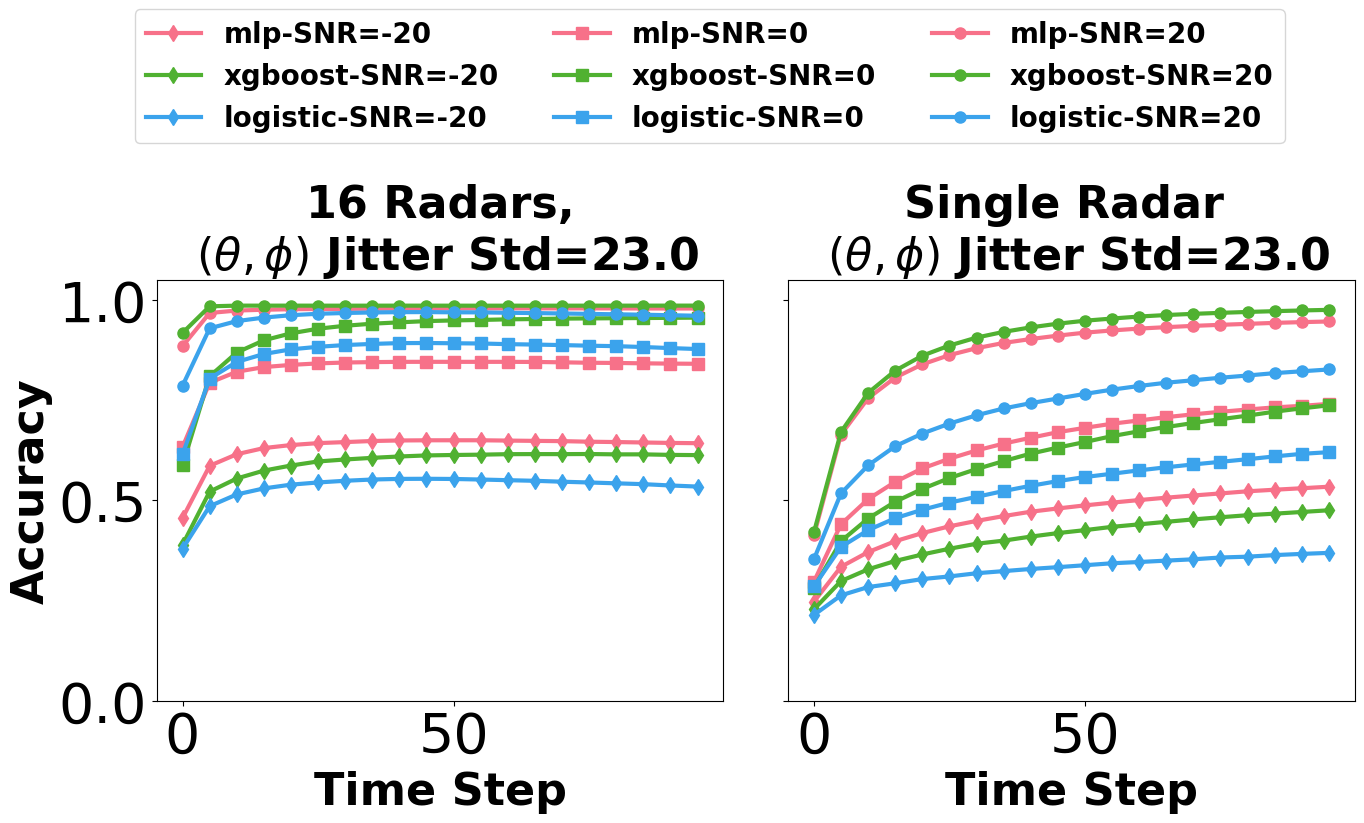

In [17]:
SNR_unique = filtered_data.SNR_constraint.unique()
Model_unique = filtered_data.model_choice.unique()
Fusion_method = ['max','average','OBF']
fusion_choice = "OBF"
colors = sns.color_palette("husl", len(Model_unique))
color_dict = {model: color for model, color in zip(Model_unique, colors)}

SNR_unique = [-20,0,20]
colors = ["blue","purple","magenta"]
markers = ["d","s","o","2","+"]
legend = []
fig,axes = plt.subplots(1,2,sharey=True,figsize=(15,7.5))
skip_every = 5
for i,SNR in enumerate(SNR_unique):
    for j,model in enumerate(Model_unique):
        temp_df = filtered_data[(filtered_data.SNR_constraint==SNR) & (filtered_data.model_choice==model) & (filtered_data.fusion_method==fusion_choice)]
        acc_single = np.array(eval(temp_df.accuracy_single_time.item()))
        acc_fused = np.array(eval(temp_df.accuracy_time.item()))
        
        axes[0].plot(np.arange(0,len(acc_fused),skip_every),acc_fused[::skip_every],marker=markers[i],markersize=8,color=color_dict[model],linewidth=3)
        axes[1].plot(np.arange(0,len(acc_fused),skip_every),acc_single[::skip_every],marker=markers[i],markersize=8,color=color_dict[model],linewidth=3)
        legend.append(f"{model}-SNR={SNR}")

jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

axes[0].set_xlabel("Time Step",weight="bold")
axes[1].set_xlabel("Time Step",weight="bold")
axes[0].set_ylim([0,1.05])
axes[1].set_ylim([0,1.05])
axes[0].set_ylabel("Accuracy",weight="bold")
axes[0].set_title(f"{N_radars} Radars,\n $(\\theta,\phi)$ Jitter Std={jitter_std}",fontsize=SMALL_SIZE*0.8,weight="bold")
axes[1].set_title(f"Single Radar \n $(\\theta,\phi)$ Jitter Std={jitter_std}",fontsize=SMALL_SIZE*0.8,weight="bold")
# axes[0].set_title(f"{N_radars} Radars, No $(\\theta,\phi)$",fontsize=20)
# axes[1].set_title(f"Single Radar, No $(\\theta,\phi)$",fontsize=20)

fig.legend(legend,loc='upper center', bbox_to_anchor=(.53, 1.17),fontsize=20, ncol=len(Model_unique),prop={"size":0.5*SMALL_SIZE,"weight":"bold"})
plt.tight_layout()

plt.savefig(os.path.join(save_folder,"accuracy_vs_snr_multi_vs_single.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Acc vs Fusion Method

In [18]:
N_radars =16
Jitter_filter = 80.
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

In [19]:
SMALL_SIZE = 90
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

In [20]:
len(SNR_unique)

3

In [21]:
SNR_unique = sorted(filtered_data.SNR_constraint.unique())[::-1]
Model_unique = filtered_data.model_choice.unique()
Fusion_method = ['max','average','OBF']

colors = sns.color_palette("husl", len(Model_unique))
color_dict = {fuse: color for fuse, color in zip(Fusion_method, colors)}

markers = ["d","s","o","2","+"]
legend = []
fig,axes = plt.subplots(len(SNR_unique),len(Model_unique),figsize=(len(Model_unique)*20,len(SNR_unique)*20),sharey=True)
skip_every = 2

for k,snr in enumerate(SNR_unique):
    for i,model in enumerate(Model_unique):
        for j,fusion_method in enumerate(Fusion_method):
            temp_df = filtered_data[(filtered_data.SNR_constraint==snr) & (filtered_data.model_choice==model) & (filtered_data.fusion_method==fusion_method)]
            acc_fused = np.array(eval(temp_df.accuracy_time.item()))
            acc_single = np.array(eval(temp_df.accuracy_single_time.item()))

            axes[k,i].plot(np.arange(0,len(acc_fused),skip_every),acc_fused[::skip_every],marker=markers[j],markersize=30,color=color_dict[fusion_method],linewidth=10)
            axes[k,i].set_title(f"{model}",fontsize=SMALL_SIZE*1.5)

            if (k == 0) and (i==0):
                legend.append(f"{fusion_method}")
            
            if (j==0) and (i == 0):
                axes[k,i].set_ylabel(f"SNR={snr}\n Accuracy",weight="bold")
        
                
        axes[k,i].plot(np.arange(0,len(acc_fused),skip_every),acc_single[::skip_every],marker=".",markersize=30,color="k",linewidth=10)
        axes[k,i].set_xlabel("time step",weight="bold")
        axes[k,i].set_ylim([0,1.05])
        
legend.append("Single Radar")
jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

fig.legend(legend,loc='upper center', bbox_to_anchor=(.5, 1.02),fontsize=SMALL_SIZE*1.5, ncol=len(Model_unique)+1,prop={"weight":"bold"})
fig.suptitle(f"Radars={N_radars}, $(\\theta,\phi)$ Jitter Std = {jitter_std}",fontsize=SMALL_SIZE*2,weight="bold")
plt.tight_layout()
plt.savefig(os.path.join(save_folder,"accuracy_vs_snr_multi.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Number of radars vs accuracy

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [23]:
SMALL_SIZE = 200
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.0)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

In [29]:
# Assuming 'df' is your DataFrame containing the data

# Filtering the DataFrame based on the given conditions
jitter_filter = 80
fusion_choice = "OBF"
filtered_data = df[
    (df['fusion_method'] == fusion_choice) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    (df["elevation_jitter_width"] == jitter_filter)
]

# Set the index to 'model_choice' and 'n_radars'
filtered_data.set_index(['model_choice', 'n_radars'], inplace=True)

# Get unique SNR_constraint values
unique_snr_values = sorted(filtered_data['SNR_constraint'].unique())

# Assign unique colors to each model
models = filtered_data.index.get_level_values('model_choice').unique()

colors = sns.color_palette("husl", len(models))
color_dict = {model: color for model, color in zip(models, colors)}

markers = ["d","s","o","2","+"]

fig, axs = plt.subplots(1,len(unique_snr_values), figsize=(30*len(unique_snr_values), 40))

legend_dict = {}  # Dictionary to store unique legend items

for i, snr_value in enumerate(unique_snr_values):
    snr_filtered_data = filtered_data[filtered_data['SNR_constraint'] == snr_value]

    # Plotting number of radars vs. accuracy for each model
    ax = axs[i]
    for model in sorted(models):  # Sort models alphabetically
        model_data = snr_filtered_data.loc[model]
        model_data = model_data.sort_values('n_radars')  # Sort by number of radars
        color = color_dict[model]

        line1 = ax.plot([1] + model_data.index.astype(int).tolist(), [model_data['accuracy_single'].mean()] + model_data['accuracy'].tolist(), marker='o', linestyle='-', label=f'{model} - accuracy', color=color,linewidth=SMALL_SIZE/3,markersize=SMALL_SIZE*0.9)
#         line2 = ax.plot(model_data.index, model_data['accuracy_single'], marker='o', linestyle='--', label=f'{model} - accuracy_single', color=color,linewidth=SMALL_SIZE/3,markersize=SMALL_SIZE/3)

        # Collect unique legend items
        if f'{model} - accuracy' not in legend_dict:
            legend_dict[f'{model} - accuracy'] = line1[0]

    ax.set_xlabel('# of Radars',fontsize=SMALL_SIZE,weight="bold")
    ax.set_ylabel('Accuracy',fontsize=SMALL_SIZE,weight="bold")
    ax.set_title(f'SNR={snr_value}',fontsize=SMALL_SIZE,weight="bold")
    ax.grid(True,linewidth=SMALL_SIZE/5)
    ax.set_xscale("log")
    ax.set_ylim(0, 1.05)  # Set y-axis limits

jitter_std = np.round(np.sqrt((jitter_filter)**2 / 12))
fig.suptitle(f"Accuracy vs Number of Radars: $(\\theta,\phi)$ Jitter Std={jitter_std}",fontsize=SMALL_SIZE,weight="bold")
# Create a single legend at the top of the figure using unique legend items
fig.legend(legend_dict.values(), legend_dict.keys(), loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=len(models),fontsize=SMALL_SIZE*0.96,prop={"weight":"bold"})
plt.tight_layout()  # Adjust subplot layout
plt.savefig(os.path.join(save_folder,"accuracy_vs_num_radars.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Results table

In [25]:
Jitter_filter = 0
N_radars = 16
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]


In [26]:
filtered_data[filtered_data.model_choice=="logistic"].drop(["run_id","experiment_id","status","artifact_uri","start_time","end_time","accuracy_time","accuracy_single_time","experiment_name"],axis=1)

accuracy  accuracy_single fusion_method  elevation_spread mlflow_track  \
479  0.542286         0.831479           max             180.0         True   
483  0.548736         0.772629           max             180.0         True   
490  0.528221         0.629464           max             180.0         True   
494  0.337157         0.480021           max             180.0         True   
499  0.259557         0.377857           max             180.0         True   
552  0.957936         0.831479           OBF             180.0         True   
559  0.941543         0.772629           OBF             180.0         True   
564  0.877950         0.629464           OBF             180.0         True   
570  0.732050         0.480021           OBF             180.0         True   
574  0.564521         0.377857           OBF             180.0         True   
641  0.728664         0.772629       average             180.0         True   
653  0.417757         0.377857       average             180.0         True   
663  0.721714         0.629464       average             180.0         True   
670  0.598293         0.480021       average             180.0         True   
671  0.769386         0.831479       average             180.0         True   

    single_method  random_seed    vx  SNR_constraint  n_radars  ...  \
479        random        123.0  50.0            20.0      16.0  ...   
483        random        123.0  50.0            10.0      16.0  ...   
490        random        123.0  50.0             0.0      16.0  ...   
494        random        123.0  50.0           -10.0      16.0  ...   
499        random        123.0  50.0           -20.0      16.0  ...   
552        random        123.0  50.0            20.0      16.0  ...   
559        random        123.0  50.0            10.0      16.0  ...   
564        random        123.0  50.0             0.0      16.0  ...   
570        random        123.0  50.0           -10.0      16.0  ...   
574        random        123.0  50.0           -20.0      16.0  ...   
641        random        123.0  50.0            10.0      16.0  ...   
653        random        123.0  50.0           -20.0      16.0  ...   
663        random        123.0  50.0             0.0      16.0  ...   
670        random        123.0  50.0           -10.0      16.0  ...   
671        random        123.0  50.0            20.0      16.0  ...   

     elevation_center  color  azimuth_center  azimuth_spread roll_range  \
479               0.0  color            90.0           180.0        0.0   
483               0.0  color            90.0           180.0        0.0   
490               0.0  color            90.0           180.0        0.0   
494               0.0  color            90.0           180.0        0.0   
499               0.0  color            90.0           180.0        0.0   
552               0.0  color            90.0           180.0        0.0   
559               0.0  color            90.0           180.0        0.0   
564               0.0  color            90.0           180.0        0.0   
570               0.0  color            90.0           180.0        0.0   
574               0.0  color            90.0           180.0        0.0   
641               0.0  color            90.0           180.0        0.0   
653               0.0  color            90.0           180.0        0.0   
663               0.0  color            90.0           180.0        0.0   
670               0.0  color            90.0           180.0        0.0   
671               0.0  color            90.0           180.0        0.0   

    num_points tags.mlflow.runName tags.mlflow.source.type  tags.mlflow.user  \
479    10000.0            logistic                   LOCAL         potter.mi   
483    10000.0            logistic                   LOCAL         potter.mi   
490    10000.0            logistic                   LOCAL         potter.mi   
494    10000.0            logistic                   LOCAL         potter.mi   
49

In [27]:
latex_df = filtered_data.groupby(["SNR_constraint","fusion_method","model_choice"])[["accuracy"]].mean()
print(latex_df.unstack().unstack())
latex_df.index.names = ["SNR","Fusion Method","ML Model"]
latex_df = latex_df.unstack().unstack().reindex(level=2,columns=["max","average","OBF"]).sort_values(by="SNR",ascending=False)
latex_df

                accuracy                                                    \
model_choice    logistic                           mlp                       
fusion_method        OBF   average       max       OBF   average       max   
SNR_constraint                                                               
-20.0           0.564521  0.417757  0.259557  0.868100  0.699029  0.527393   
-10.0           0.732050  0.598293  0.337157  0.952464  0.819236  0.618157   
 0.0            0.877950  0.721714  0.528221  0.977836  0.921071  0.788107   
 10.0           0.941543  0.728664  0.548736  0.999921  0.994979  0.955014   
 20.0           0.957936  0.769386  0.542286  0.999993  0.999486  0.990164   

                                              
model_choice     xgboost                      
fusion_method        OBF   average       max  
SNR_constraint                                
-20.0           0.932979  0.643657  0.405279  
-10.0           0.979050  0.776457  0.492600  
 0.0           

accuracy                                                    \
ML Model       logistic                           mlp                       
Fusion Method       max   average       OBF       max   average       OBF   
SNR                                                                         
 20.0          0.542286  0.769386  0.957936  0.990164  0.999486  0.999993   
 10.0          0.548736  0.728664  0.941543  0.955014  0.994979  0.999921   
 0.0           0.528221  0.721714  0.877950  0.788107  0.921071  0.977836   
-10.0          0.337157  0.598293  0.732050  0.618157  0.819236  0.952464   
-20.0          0.259557  0.417757  0.564521  0.527393  0.699029  0.868100   

                                             
ML Model        xgboost                      
Fusion Method       max   average       OBF  
SNR                                          
 20.0          0.946793  1.000000  1.000000  
 10.0          0.832214  0.999979  1.000000  
 0.0           0.705329  0.992214  0.999979  
-10.0          0.492600  0.776457  0.979050  
-20.0          0.405279  0.643657  0.932979

In [28]:
single_latex_df.loc[:,~single_latex_df.columns.duplicated()]

NameError: name 'single_latex_df' is not defined

In [ ]:
single_latex_df = filtered_data.groupby(["SNR_constraint","fusion_method","model_choice"])[["accuracy_single"]].mean()
# print(single_latex_df.unstack().unstack())
single_latex_df.index.names = ["SNR","Fusion Method","ML Model"]
# print(single_latex_df)
single_latex_df = single_latex_df.unstack().unstack().reindex(level=2,columns=["max","average","OBF"]).sort_values(by="SNR",ascending=False)
print(single_latex_df)
single_latex_df = single_latex_df.rename(columns={"max":"single","average":"single","OBF":"single"},level=2).T.drop_duplicates().T.rename(columns={"accuracy_single":"accuracy"},level=0)
single_latex_df = single_latex_df.loc[:,~single_latex_df.columns.duplicated()]

In [ ]:
final_latex_df = pd.concat((single_latex_df,latex_df),axis=1).sort_values(axis=1,by="ML Model")
final_latex_df = final_latex_df.applymap(lambda x: np.round(x,3))
final_latex_df

In [ ]:
latex_str = final_latex_df.to_latex(multicolumn_format="c",index=True)
print(latex_str)